In [127]:
import glob
import matplotlib.pyplot as plt
import pandas as pd

In [128]:
names = 'names'
all_files = [f for f in glob.glob(names + "/*.txt", recursive=True)]
years = [i for i in range (1900, 2001)]

In [129]:
def get_data_for_plots(all_files, years):
    files = [f for f in all_files if any((str(year) in f for year in years))]
    names_by_year = {year:pd.read_csv(file, names=['Name','Gender','Count']) for (year, file) in zip(years, files)}
    names_all = pd.concat(names_by_year).reset_index(level=1, drop=True)
    return names_all


In [130]:
def get_plot_for_names(years, *args):
    data = get_data_for_plots(all_files, years)
    data = data[data['Name'].isin(args)]
    names_sorted = data.groupby([data.index, 'Name']).sum().unstack('Name')
    names_sorted.plot(title=f'Dynamics for names: {args} between {years[0]} and {years[-1]}')
    

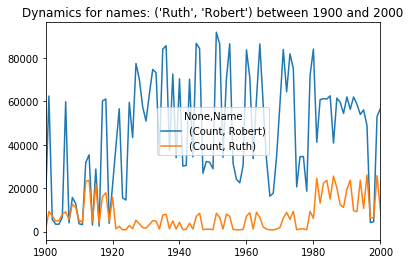

In [131]:
get_plot_for_names(years, 'Ruth', 'Robert')

In [132]:
def draw_bar_for_names(years, step, *args):
    data = get_data_for_plots(all_files, years)
    data = data[data['Name'].isin(args)]
    names_sorted = data.groupby([data.index, 'Name']).sum().unstack('Name')[::step]
    names_sorted.plot.bar(title=f'Dynamics for names: {args} between {years[0]} and {years[-1]} in {step} years step')

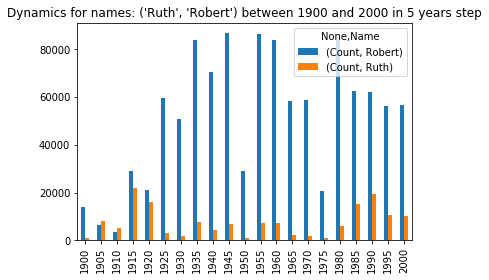

In [133]:
draw_bar_for_names(years, 5, 'Ruth', 'Robert')

In [134]:
def draw_pie_for_names(year, letter):
    data = get_data_for_plots(all_files, [year,])
    names_for_letter = data[data.Name.str.startswith(letter)].groupby('Name').sum().nlargest(10, 'Count')
    names_for_letter.plot(kind='pie', subplots=True, title=f'Top 10 names starting with {letter} in {year}', legend=False)

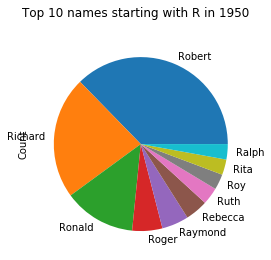

In [135]:
draw_pie_for_names(1950, 'R')

In [136]:
def draw_scatter_for_names(all_files, years):
    data = get_data_for_plots(all_files, years).groupby('Name', as_index=False).sum()
    pattern = 'B|C|D|F|G|H|J|K|L|M|N|P|Q|R|S|T|V|W|X|Z|b|c|d|f|g|h|j|k|l|m|n|p|q|r|s|t|v|w|x|z'
    data['Consonant'] = data['Name'].str.count(pattern)
    data.plot(kind='scatter', x='Consonant', y='Count')
    plt.xlabel('Number of consonants in a name')
    plt.ylabel('Count')
    plt.title(f'Dynamics for consonants in names between {years[0]} and {years[-1]}')

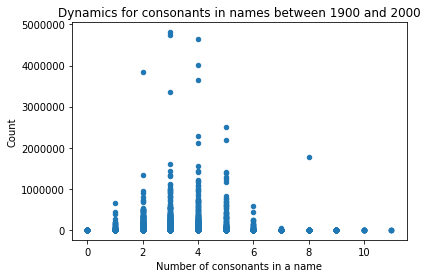

In [137]:
draw_scatter_for_names(all_files, years)